# Google Play App Review Dataset

#### Importing theRequired Packages

In [1]:
### Supervised Learning Assignment
### Google Play Store Dataset

## Importing various packages which can aid us to work on the dataset
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle, islice
from sklearn.linear_model import Lasso
import numpy as np
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics 
import xgboost
from xgboost import XGBClassifier
import catboost
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from numpy import asarray
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import datetime
from sklearn.metrics import confusion_matrix

## Processing the Dataset

#### Read the Dataset to be processed and understand the dataset

In [2]:
## Reading the google play store dataset in a dataframe
google_data = pd.read_csv("googleplaystore.csv")

## Understanding the dataset columns, rows and check for missing values and draw out data description
# Check the total number of rows and ccolumns
print("Total number of rows and columns in the data set are: ",google_data.shape)
# Identify the columns present in the dataset
print("The columns in the dataset are as followed: \n", google_data.columns)
# Check the datatypes of each column in python
print("THe data types of each columns are:\n", google_data.dtypes)
# Check for null values
print("Check whether there are missing values in the dataset or not:\n", google_data.isnull().sum())
# Print the dataset to view the data
print(google_data)
df1 = google_data

Total number of rows and columns in the data set are:  (10839, 13)
The columns in the dataset are as followed: 
 Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
THe data types of each columns are:
 App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object
Check whether there are missing values in the dataset or not:
 App                  0
Category             0
Rating            1473
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updat

#### Cleaning and Pre-Processing the dataset for further use

In [3]:
## Converting the categorical values using one hot encoder
le_Category = LabelEncoder()
le_ContentRating = LabelEncoder()
le_Type = LabelEncoder()

df1['Category_n'] = le_Category.fit_transform(df1['Category'])
df1['Type_n'] = le_Type.fit_transform(df1['Type'])
df1['ContentRating_n'] = le_ContentRating.fit_transform(df1['Content Rating'])

In [4]:
## Convert the Size variable in thousands
for i in range(len(df1)):
    value = df1['Size'].values[i]
    ver = value.isnumeric()
    try:  
        float(value) 
        ver1 = True
    except: 
        ver1 = False
    if ((ver == True) or (ver1 == True)):
        value = float(value) * 1000
        df1['Size'].values[i] = value
    elif value == 'Varies with device':
        df1['Size'].values[i] = 0
    else:
        value = value.replace("k", "")
        df1['Size'].values[i] = value

new = df1["Last Updated"].str.split(", ", n = 1, expand = True)
df1["Last Updated"] = new[1]

In [5]:
## Dropping the unnecessary columns
df1 = df1.drop(['Genres', 'Current Ver', 'Android Ver', 'Category', 'Type', 'Content Rating'], axis = 'columns')

In [6]:
## Impute the missing values of the rating
df1['Rating'] = df1['Rating'].fillna(df1['Rating'].median())
df1['Last Updated'] = df1['Last Updated'].fillna(df1['Last Updated'].mode())
median_size = df1['Size'].median()
df1['Size'] = df1['Size'].replace(0, median_size)

for i in range(len(df1)):
    value = df1["Rating"].values[i]
    if (1<=value<=1.9):
        df1["Rating"].values[i] = 1
    elif (2<=value<=2.9):
        df1["Rating"].values[i] = 2
    elif (3<=value<=3.9):
        df1["Rating"].values[i] = 3
    elif (4<=value<=4.9):
        df1["Rating"].values[i] = 4
    elif value==5:
        df1["Rating"].values[i] = 5
    else:
        df1["Rating"].values[i] = 0

#### Understanding the parameters of the newly created dataset

In [7]:
print("Total number of rows and columns in the data set are: ",df1.shape)
# Identify the columns present in the dataset
print("The columns in the dataset are as followed: \n", df1.columns)
# Check the datatypes of each column in python
print("THe data types of each columns are:\n", df1.dtypes)
# Check for null values
print("Check whether there are missing values in the dataset or not:\n", df1.isnull().sum())
# Print the dataset to view the data
print(df1)

Total number of rows and columns in the data set are:  (10839, 10)
The columns in the dataset are as followed: 
 Index(['App', 'Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated',
       'Category_n', 'Type_n', 'ContentRating_n'],
      dtype='object')
THe data types of each columns are:
 App                 object
Rating             float64
Reviews              int64
Size                object
Installs             int64
Price              float64
Last Updated        object
Category_n           int32
Type_n               int32
ContentRating_n      int32
dtype: object
Check whether there are missing values in the dataset or not:
 App                0
Rating             0
Reviews            0
Size               0
Installs           0
Price              0
Last Updated       0
Category_n         0
Type_n             0
ContentRating_n    0
dtype: int64
                                                     App  Rating  Reviews  \
0         Photo Editor & Candy Camera & Grid & Scr

In [8]:
google_data.shape

(10839, 16)

In [9]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10839 entries, 0 to 10838
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              10839 non-null  object 
 1   Category         10839 non-null  object 
 2   Rating           9366 non-null   float64
 3   Reviews          10839 non-null  int64  
 4   Size             10839 non-null  object 
 5   Installs         10839 non-null  int64  
 6   Type             10839 non-null  object 
 7   Price            10839 non-null  float64
 8   Content Rating   10839 non-null  object 
 9   Genres           10839 non-null  object 
 10  Last Updated     10839 non-null  object 
 11  Current Ver      10831 non-null  object 
 12  Android Ver      10837 non-null  object 
 13  Category_n       10839 non-null  int32  
 14  Type_n           10839 non-null  int32  
 15  ContentRating_n  10839 non-null  int32  
dtypes: float64(2), int32(3), int64(2), object(9)
memory usage:

In [10]:
# Number of NaN's in every column
google_data.isnull().sum()

App                   0
Category              0
Rating             1473
Reviews               0
Size                  0
Installs              0
Type                  0
Price                 0
Content Rating        0
Genres                0
Last Updated          0
Current Ver           8
Android Ver           2
Category_n            0
Type_n                0
ContentRating_n       0
dtype: int64

In [11]:
google_data.Category.unique() 

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

## Exploratory Data Analysis

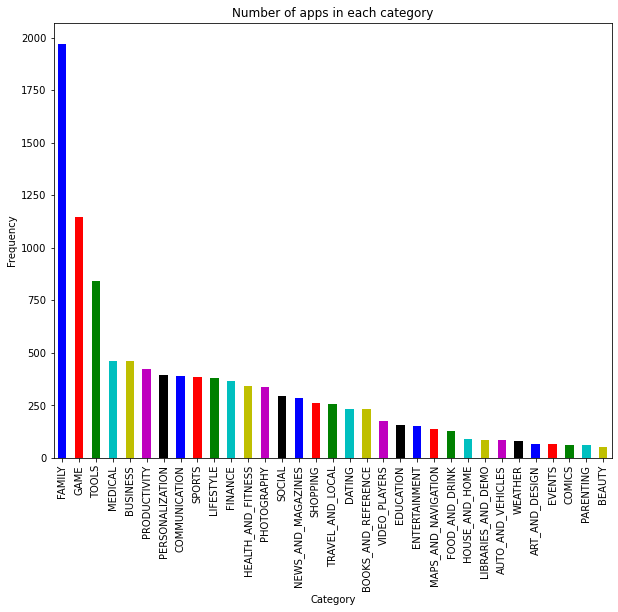

In [12]:
# Barchart
my_colors = list(islice(cycle(['b', 'r', 'g', 'c', 'y', 'm','k']), None, len(google_data))) # a way to represent different colours 

google_data.Category.value_counts().plot(kind = 'bar', color = my_colors, figsize = (10,8), title = 'Number of apps in each category');
plt.xlabel('Category')
plt.ylabel('Frequency');

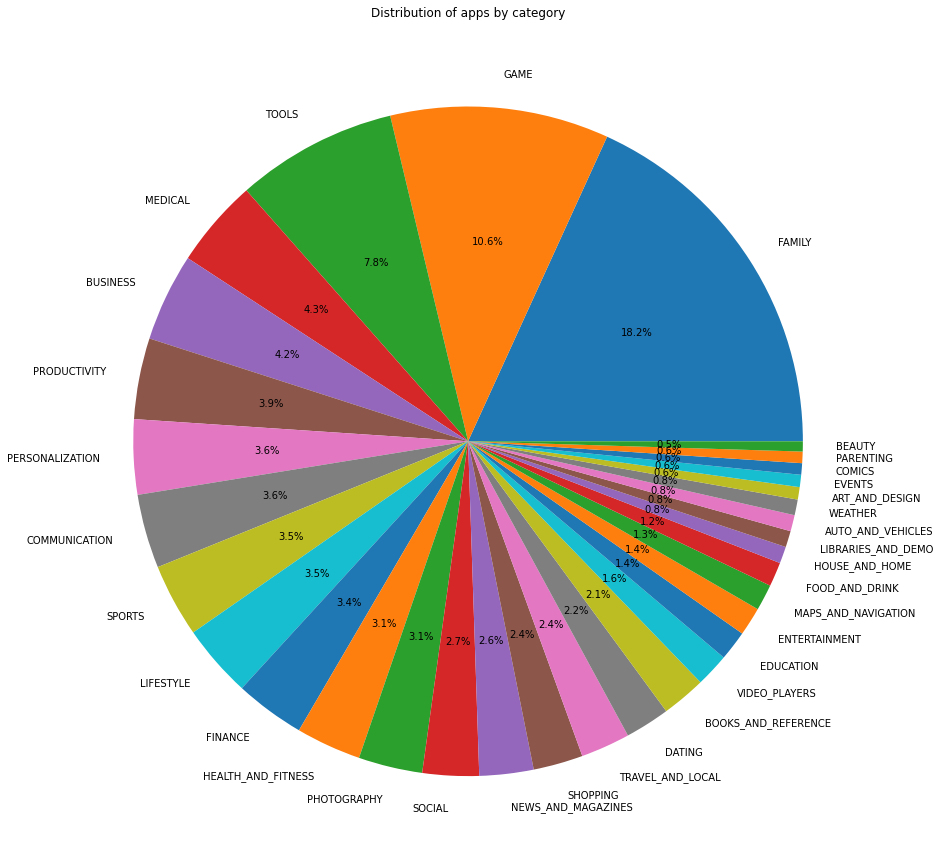

In [13]:
# Piechart
google_data['Category'].value_counts().plot.pie(y = google_data['Category'], figsize = (15, 16), label = '', autopct = '%1.1f%%', title = 'Distribution of apps by category', );# label = '' removes column name

In [14]:
# We clean the Rating column with the help of lambda function
google_data['Rating'] = google_data['Rating'].apply(lambda x: str(x).replace('nan', 'NaN') if 'nan' in str(x) else str(x))  # Replace nan with NaN
google_data['Rating'] = google_data['Rating'].apply(lambda x: float(x)) # Rewrite column in a float format

google_data['Rating'] = google_data['Rating'].fillna(google_data['Rating'].median()) # Replace null numbers with median numbers

google_data.Rating.isnull().sum() # Now we don't have any null numbers in the column

0

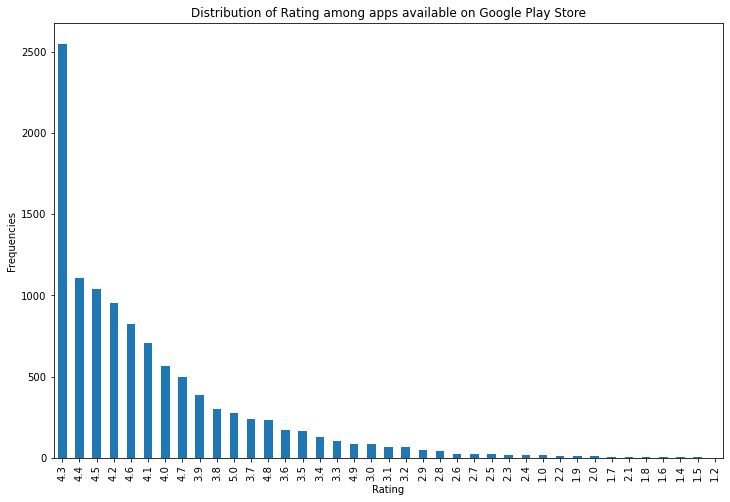

In [15]:
# Barchart
google_data.Rating.value_counts().plot(kind = 'bar', stacked = True, figsize = (12, 8), title = 'Distribution of Rating among apps available on Google Play Store'); # Historgram of frequencies 
plt.xlabel('Rating')
plt.ylabel('Frequencies');

In [16]:
google_data.Reviews.isnull().sum() # No null values in reviews column

0

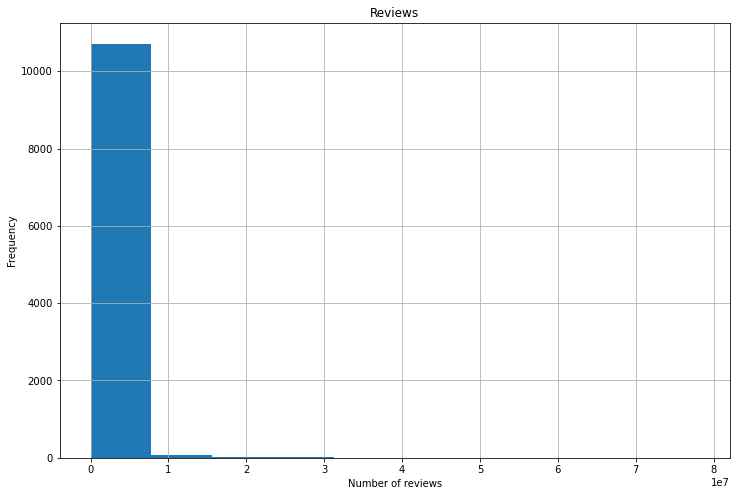

In [17]:
google_data.Reviews = pd.to_numeric(google_data.Reviews)

google_data.hist(column = 'Reviews', figsize = (12, 8))
plt.xlabel('Number of reviews')
plt.ylabel('Frequency');

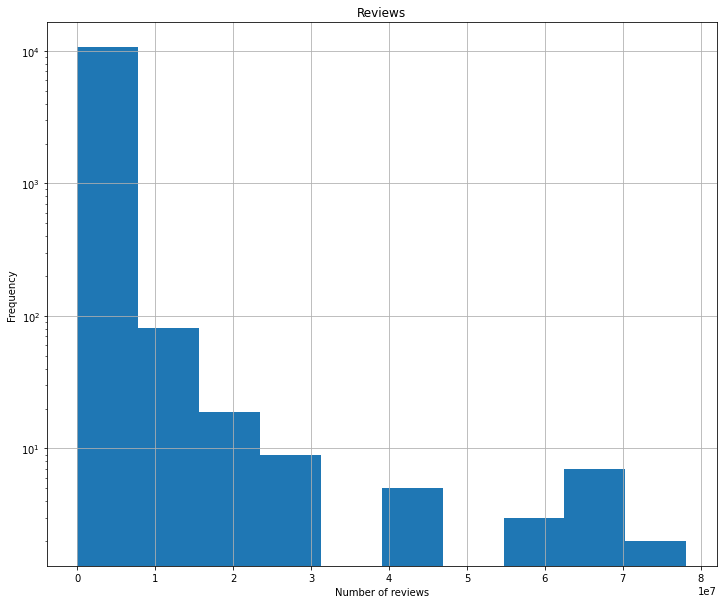

In [18]:
# Log view of the graph
google_data.hist(column = 'Reviews', figsize = (12, 10))
plt.xlabel('Number of reviews')
plt.ylabel('Frequency')
plt.yscale('log')

In [19]:
# Occurences of different numbers at the Size column
google_data.Size.value_counts()

0.0        1694
11000.0     198
12000.0     196
14000.0     194
13000.0     191
           ... 
683           1
865           1
222           1
498           1
619           1
Name: Size, Length: 460, dtype: int64

In [20]:
# Clean Size column
google_data['Size'] = google_data['Size'].apply(lambda x: str(x).replace('M', 'e+6') if 'M' in str(x) else str(x)) # Convert Megabytes to bytes
google_data['Size'] = google_data['Size'].apply(lambda x: str(x).replace('k', 'e+3') if 'k' in str(x) else str(x)) # Convert kilobytes to bytes

# Function converts number to float, if possible
def is_convertable(number):
    try:
        float(number)
        return True
    
    except:
        return False
    
    
size_column = google_data.Size.apply(lambda x: is_convertable(x))    
size_column.head()

0    True
1    True
2    True
3    True
4    True
Name: Size, dtype: bool

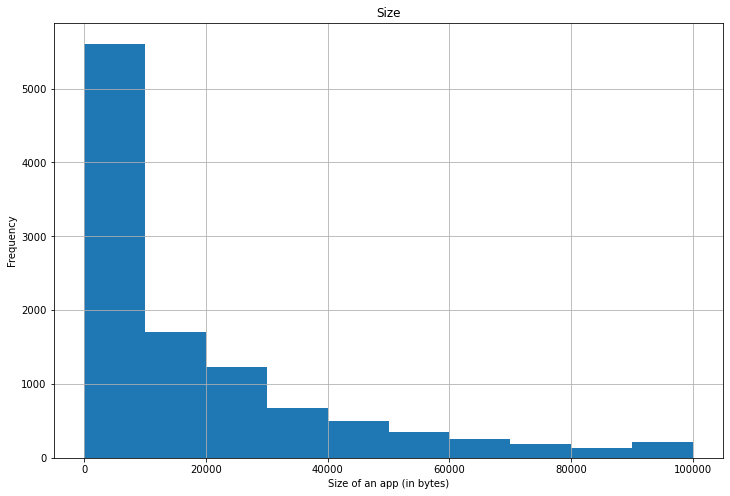

In [21]:
google_data.Size[~size_column].value_counts()
google_data.Size =  google_data.Size.replace('Varies with device', np.nan) # Replacing 'Varies with Device' with NaN to convert to float
google_data.Size = pd.to_numeric(google_data.Size) # Convert to numeric

# Plotting Histogram
google_data.hist(column = 'Size', figsize = (12, 8))
plt.xlabel('Size of an app (in bytes)')
plt.ylabel('Frequency');

In [22]:
# Keep Varies with device option in the column for now
google_data.Size = google_data.Size.replace(np.nan, 'Varies with device')
google_data.Size.isnull().sum()

0

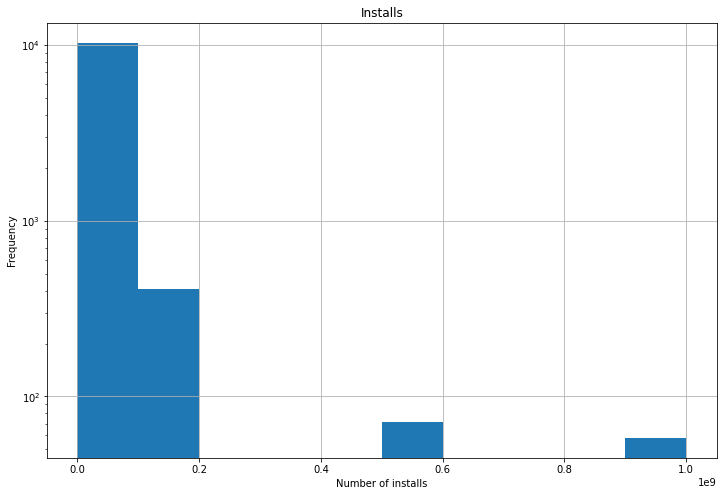

In [23]:
# Cleaning Installs
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: float(x))

# Histogram of Installs 
google_data.Installs = pd.to_numeric(google_data.Installs)
google_data.hist(column = 'Installs', figsize = (12, 8))
plt.xlabel('Number of installs')
plt.ylabel('Frequency')
plt.yscale('log')


Number of Apps with Installs <= 100000:  5889


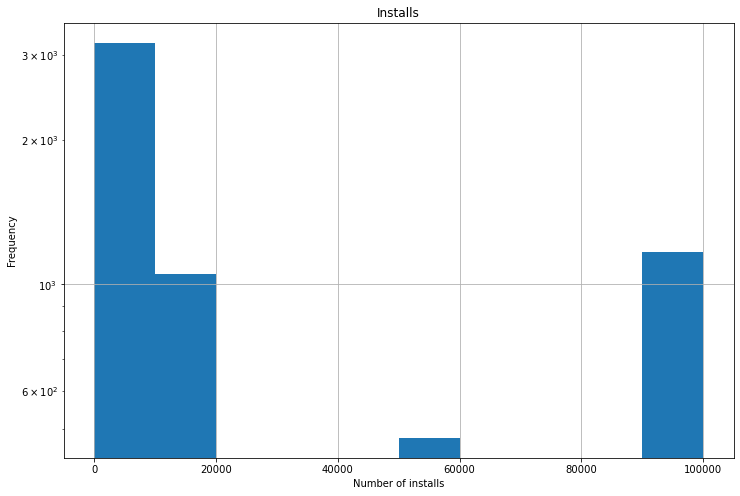

In [24]:
# Cleaning Installs
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
google_data['Installs'] = google_data['Installs'].apply(lambda x: float(x))

# Histogram of Installs 
google_data.Installs = pd.to_numeric(google_data.Installs)
google_data.hist(column = 'Installs', figsize = (12, 8), range = [0, 100000])
plt.xlabel('Number of installs')
plt.ylabel('Frequency')
plt.yscale('log')
print('Number of Apps with Installs <= 100000: ', len(google_data[google_data.Installs <= 100000]) )

In [25]:
google_data['Type'].fillna(str(google_data['Type'].mode().values[0]), inplace = True) # Fill NaN entries with mode value in the column. 'Free' is the mode in this case 
google_data.Type.isnull().sum()

0

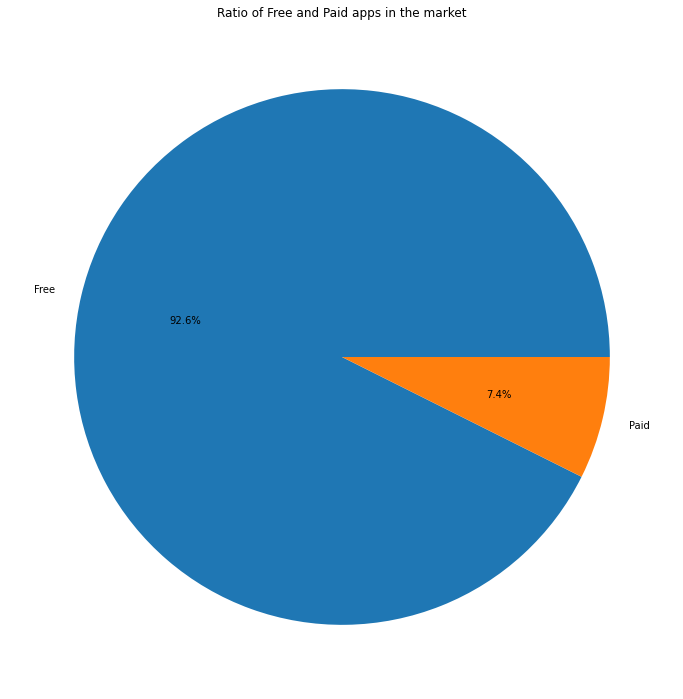

In [26]:
# The Free vs Paid apps
google_data.Type.value_counts().plot.pie(y = google_data.Type, figsize = (12, 14), autopct = '%1.1f%%', title = 'Ratio of Free and Paid apps in the market',label = '');

In [27]:
google_data[google_data.Type == 'Paid'] # Shows paid columns. In the paid columns I want to delete the dollar ($) sign
google_data['Price'] = google_data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))  # delete dollar sign
google_data['Price'] = google_data['Price'].apply(lambda x: float(x))

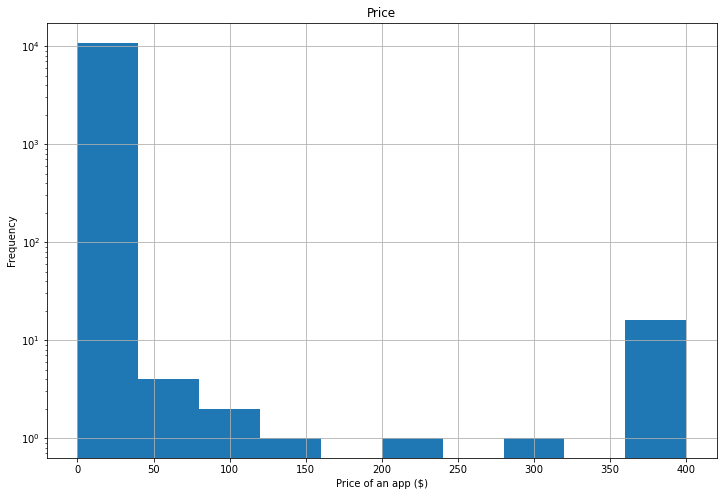

In [28]:
google_data.Price = pd.to_numeric(google_data.Price)
google_data.hist(column = 'Price', figsize = (12, 8))
plt.xlabel('Price of an app ($)')
plt.ylabel('Frequency');
plt.yscale('log')

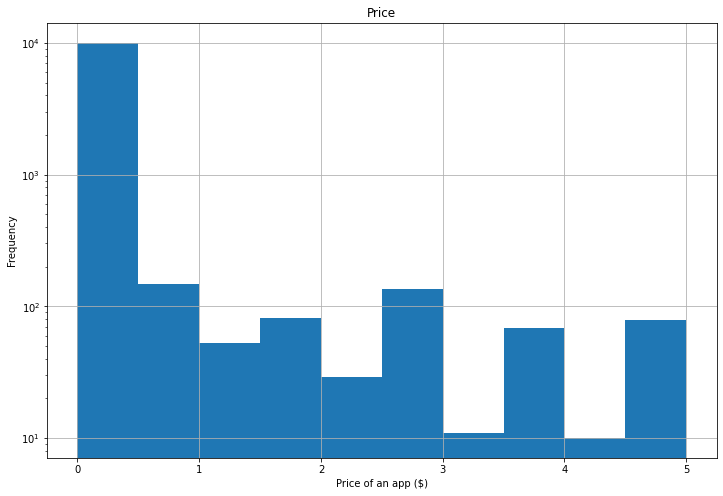

In [29]:
google_data.Price = pd.to_numeric(google_data.Price)
google_data.hist(column = 'Price', figsize = (12, 8), range = [0, 5])
plt.xlabel('Price of an app ($)')
plt.ylabel('Frequency');
plt.yscale('log')

In [30]:
print('Number of apps that have a price tag of 350$+ :',len(google_data[google_data.Price > 350])) # 16 apps that cost more than 350 bucks... Most of them are 'I am rich' apps

Number of apps that have a price tag of 350$+ : 16


['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


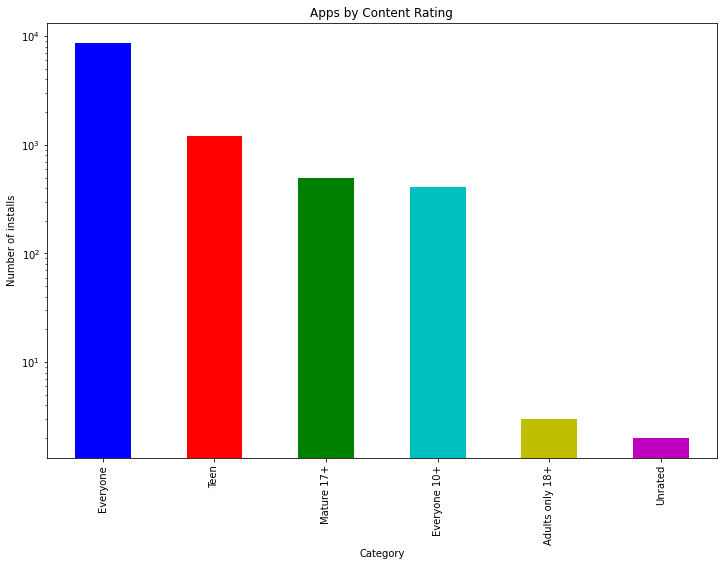

In [31]:
print(google_data['Content Rating'].unique())
google_data['Content Rating'].value_counts().plot(kind = 'bar', title = 'Apps by Content Rating', color = my_colors, figsize = (12,8)) # It is good but We cant see the data for some columns. Use log scale for y axis
plt.xlabel('Category')
plt.ylabel('Number of installs')
plt.yscale('log');

In [32]:
# Show how data is distributed. We can see that majority of genre is represented in format Category;Subcategory
google_data.Genres.unique()
google_data.Genres.isnull().sum()

0

In [33]:
google_data['Current Ver']

0                     1.0.0
1                     2.0.0
2                     1.2.4
3        Varies with device
4                       1.1
                ...        
10834                   1.2
10835                 1.9.3
10836                  2.22
10837                   2.7
10838                   1.1
Name: Current Ver, Length: 10839, dtype: object

In [34]:
google_data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [35]:
# Rewrite Android column in numerical format
google_data['Android Ver'] = google_data['Android Ver'].apply(lambda x: str(x).replace(' and up', '') if ' and up' in str(x) else str(x))
google_data['Android Ver'] = google_data['Android Ver'].apply(lambda x: str(x).strip('W'))
google_data['Android Ver'] = google_data['Android Ver'].apply(lambda x: str(x).split('-')[-1])

google_data['Android Ver'] = google_data['Android Ver'].apply(lambda x: str(x).strip()) # Remove extra whitespace before the end of a string

google_data['Android Ver'].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3',
       'Varies with device', '2.2', '5.0', '6.0', '1.6', '1.5', '2.1',
       '7.0', '5.1', '4.3', '7.1.1', '2.0', '3.2', '7.1', '8.0', '3.1',
       '2.0.1', 'nan', '1.0'], dtype=object)

In [36]:
print('Number of \'Varies with Device\' in Android Ver column: ', google_data[google_data['Android Ver'] == 'Varies with device'].count()[0] )
print('Number of \'nan\' in Android Ver column', google_data[google_data['Android Ver'] == 'nan'].count()[0])

Number of 'Varies with Device' in Android Ver column:  1361
Number of 'nan' in Android Ver column 2


In [37]:
google_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_n,Type_n,ContentRating_n
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.00,Everyone,Art & Design,2018,1.0.0,4.0.3,0,0,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.00,Everyone,Art & Design;Pretend Play,2018,2.0.0,4.0.3,0,0,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000.0,Free,0.00,Everyone,Art & Design,2018,1.2.4,4.0.3,0,0,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.00,Teen,Art & Design,2018,Varies with device,4.2,0,0,4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000.0,Free,0.00,Everyone,Art & Design;Creativity,2018,1.1,4.4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FP VoiceBot,FAMILY,4.3,17,157.0,100.0,Paid,0.99,Mature 17+,Entertainment,2015,1.2,2.1,11,1,3
10835,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400.0,1000.0,Paid,7.99,Everyone,Health & Fitness,2018,1.9.3,4.2,15,1,1
10836,Trine 2: Complete Story,GAME,3.8,252,11000.0,10000.0,Paid,16.99,Teen,Action,2015,2.22,5.0,14,1,4
10837,"sugar, sugar",FAMILY,4.2,1405,9500.0,10000.0,Paid,1.20,Everyone,Puzzle,2018,2.7,2.3,11,1,1


In [38]:
# Drop the rows that have Size as Varies with device
google_data.Size = google_data.Size.replace('Varies with device', np.nan) 
google_data.Size =  google_data.Size.dropna()
google_data.Size = google_data.Size.apply(lambda x: float(x))

In [40]:
google_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_n,Type_n,ContentRating_n
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.00,Everyone,Art & Design,2018,1.0.0,4.0.3,0,0,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.00,Everyone,Art & Design;Pretend Play,2018,2.0.0,4.0.3,0,0,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000.0,Free,0.00,Everyone,Art & Design,2018,1.2.4,4.0.3,0,0,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.00,Teen,Art & Design,2018,Varies with device,4.2,0,0,4
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000.0,Free,0.00,Everyone,Art & Design;Creativity,2018,1.1,4.4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FP VoiceBot,FAMILY,4.3,17,157.0,100.0,Paid,0.99,Mature 17+,Entertainment,2015,1.2,2.1,11,1,3
10835,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400.0,1000.0,Paid,7.99,Everyone,Health & Fitness,2018,1.9.3,4.2,15,1,1
10836,Trine 2: Complete Story,GAME,3.8,252,11000.0,10000.0,Paid,16.99,Teen,Action,2015,2.22,5.0,14,1,4
10837,"sugar, sugar",FAMILY,4.2,1405,9500.0,10000.0,Paid,1.20,Everyone,Puzzle,2018,2.7,2.3,11,1,1


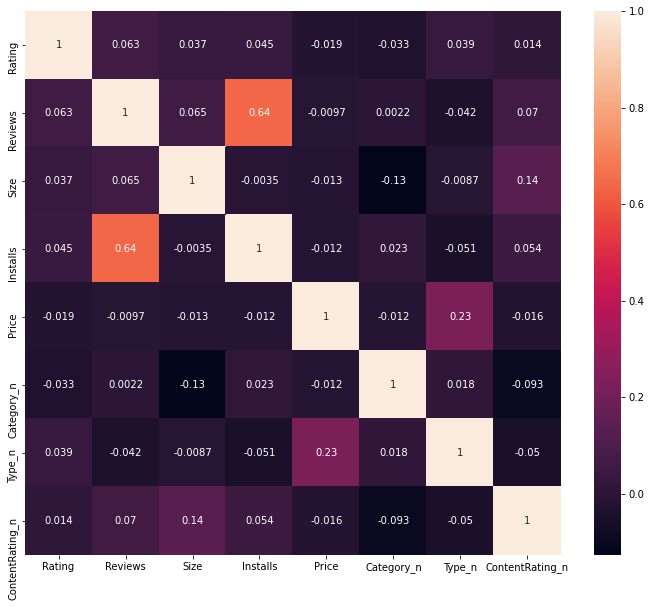

In [41]:
# Correlation map
plt.figure(figsize = (12, 10)); # Adding command before the heatmap allows to control the size of a plot
sns.heatmap(google_data.corr(), annot = True);

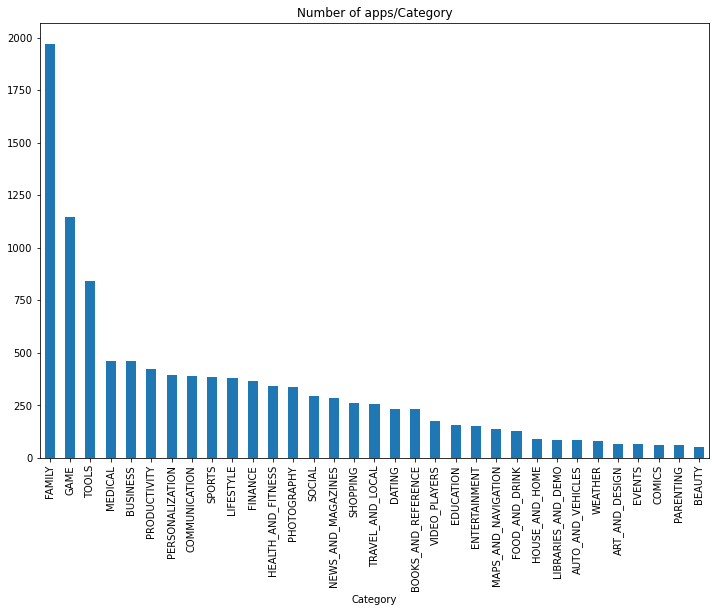

In [42]:
# Total Number of apps per category

google_data.groupby('Category').count()["App"].sort_values(ascending=False).plot(kind='bar',title='Number of apps/Category', fontsize=10, figsize = (12, 8));

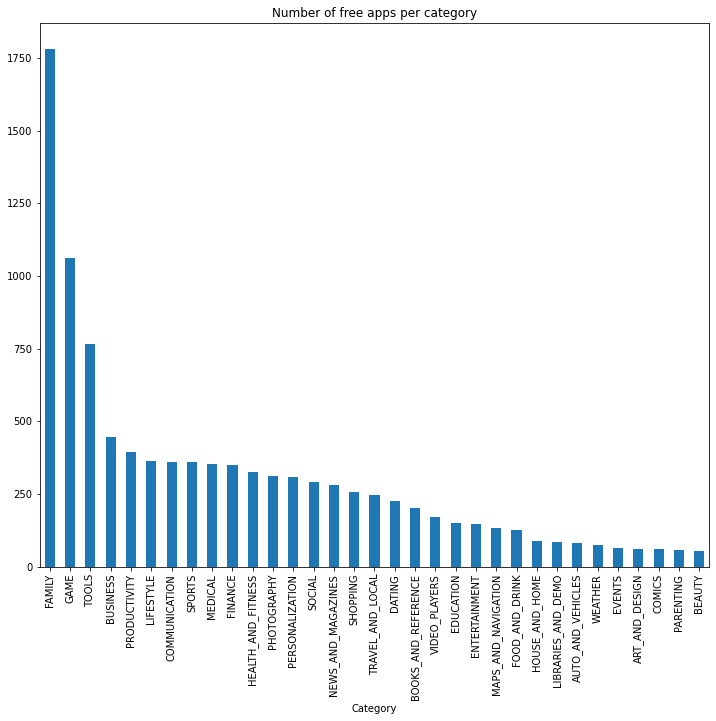

In [43]:
free_apps = google_data[google_data.Type == 'Free']
free_apps.groupby('Category').count()['App'].sort_values(ascending = False).plot(kind = 'bar', figsize = (12,10), title = 'Number of free apps per category'); 

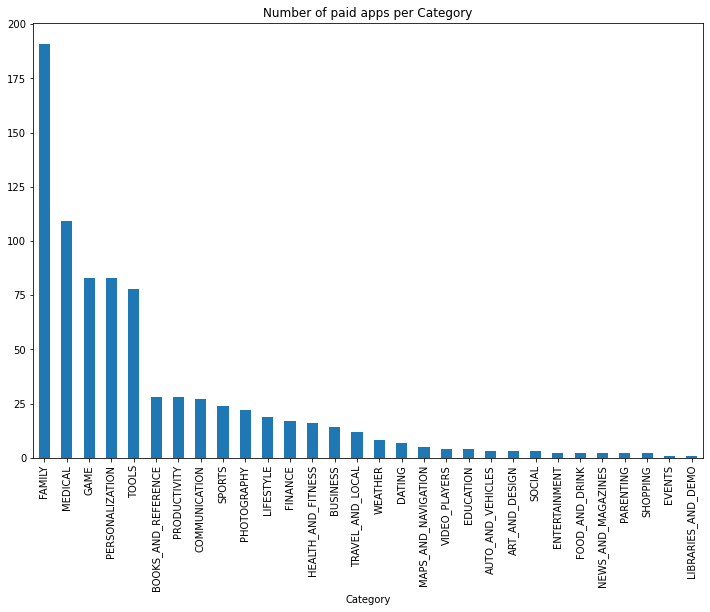

In [44]:
# Number of paid app per category
paid_apps = google_data[google_data.Price > 0]
paid_apps.groupby('Category').count()["App"].sort_values(ascending=False).plot(kind='bar',title='Number of paid apps per Category', fontsize=10, figsize = (12, 8));

Number of unique apps that have more than a billion installs: 20


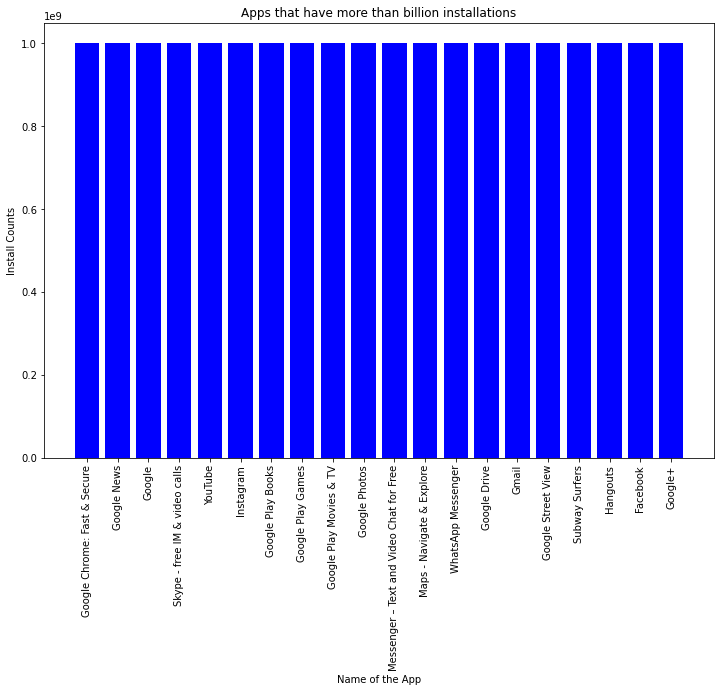

In [45]:
# Apps that have more than 1 Billion installations
google_data.drop_duplicates(subset = 'App', inplace = True) # Remove duplicate apps. The apps have almost identical rows - having a very small difference in number of installs, but being same in other columns

billion_installs = google_data[google_data.Installs >= 1e9]

billion_installs = google_data.sort_values('Installs', ascending = False).head(len(billion_installs))

print('Number of unique apps that have more than a billion installs:', len(billion_installs)) 

plt.figure(figsize = (12,8))
plt.bar('App', 'Installs', data = billion_installs, color = 'blue')
plt.xticks(rotation = 90);
plt.xlabel('Name of the App')
plt.ylabel('Install Counts')
plt.title('Apps that have more than billion installations');

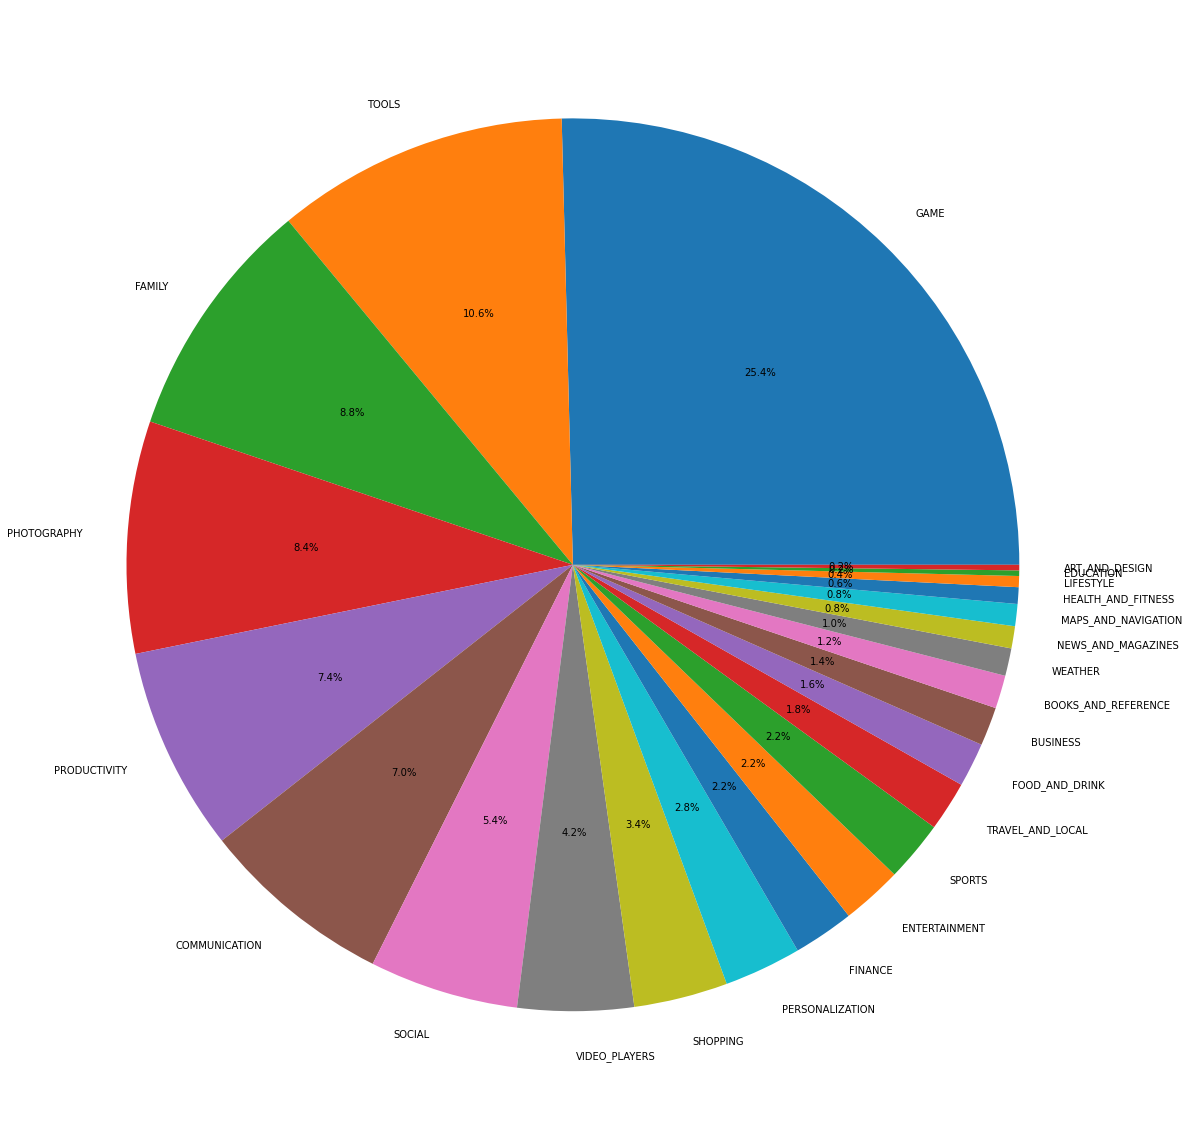

In [46]:
top_five_hundred = google_data.sort_values('Installs', ascending= False).head(500) # Top 500 apps by Category
# labels = df3['Content Rating'].value_counts(sort = True).index

top_five_hundred.Category.value_counts().plot.pie(y = top_five_hundred.Category,fontsize = 10, figsize = (20,32), autopct='%1.1f%%', label = '');

In [47]:
# paid_apps = google_data[google_data.Price > 0]
google_data.Price.describe()

count    9658.000000
mean        1.097344
std        16.852487
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [48]:
# Revenue of paid apps by category
paid_apps = google_data[google_data.Price > 0]
paid_apps['Revenue'] = paid_apps.Price * paid_apps.Installs
paid_apps

<ipython-input-48-9ce67dbb62ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_apps['Revenue'] = paid_apps.Price * paid_apps.Installs


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_n,Type_n,ContentRating_n,Revenue
10039,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.0,100000.0,Paid,4.99,Everyone,Business,2018,1.5.2,4.0,4,1,1,499000.0
10040,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.0,100000.0,Paid,4.99,Everyone,Business,2017,3.4.6,3.0,4,1,1,499000.0
10043,Puffin Browser Pro,COMMUNICATION,4.0,18247,0.0,100000.0,Paid,3.99,Everyone,Communication,2018,7.5.3.20547,4.1,6,1,1,399000.0
10044,"Moco+ - Chat, Meet People",DATING,4.2,1545,0.0,10000.0,Paid,3.99,Mature 17+,Dating,2018,2.6.139,4.1,7,1,3,39900.0
10046,Truth or Dare Pro,DATING,4.3,0,20000.0,50.0,Paid,1.49,Teen,Dating,2017,1,4.0,7,1,4,74.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FP VoiceBot,FAMILY,4.3,17,157.0,100.0,Paid,0.99,Mature 17+,Entertainment,2015,1.2,2.1,11,1,3,99.0
10835,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400.0,1000.0,Paid,7.99,Everyone,Health & Fitness,2018,1.9.3,4.2,15,1,1,7990.0
10836,Trine 2: Complete Story,GAME,3.8,252,11000.0,10000.0,Paid,16.99,Teen,Action,2015,2.22,5.0,14,1,4,169900.0
10837,"sugar, sugar",FAMILY,4.2,1405,9500.0,10000.0,Paid,1.20,Everyone,Puzzle,2018,2.7,2.3,11,1,1,12000.0


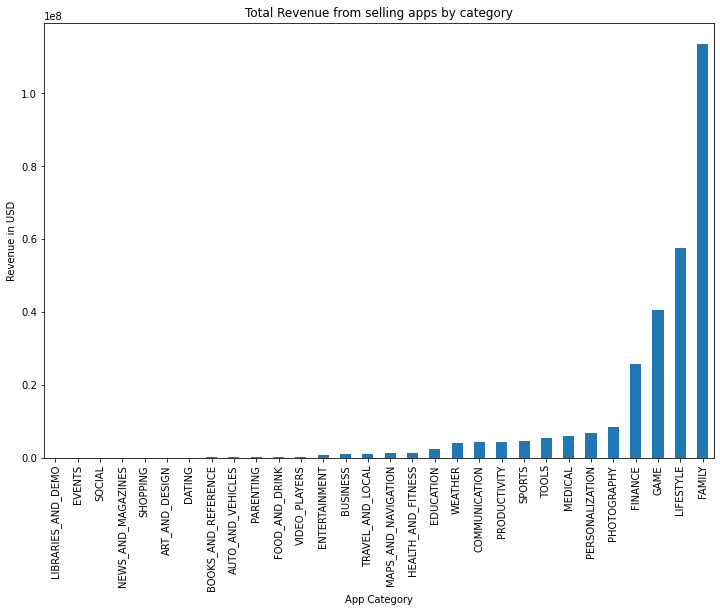

In [49]:
paid_apps.groupby('Category').sum().sort_values(by = 'Revenue', ascending = 'False')['Revenue'].plot(kind = 'bar',title='Total Revenue from selling apps by category', fontsize=10, figsize = (12, 8));
plt.xlabel('App Category')
plt.ylabel('Revenue in USD');

In [50]:
# Delete duplicate rows
paid_apps.sort_values('App', inplace = True)
paid_apps.drop_duplicates(subset = 'App', keep = False, inplace = True )
print('Total Revenue from installations of all Paid Apps is', paid_apps.Revenue.sum()/1e6,'million USD') 

Total Revenue from installations of all Paid Apps is 291.14016879 million USD


<ipython-input-50-6fa67a10787b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_apps.sort_values('App', inplace = True)
<ipython-input-50-6fa67a10787b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_apps.drop_duplicates(subset = 'App', keep = False, inplace = True )


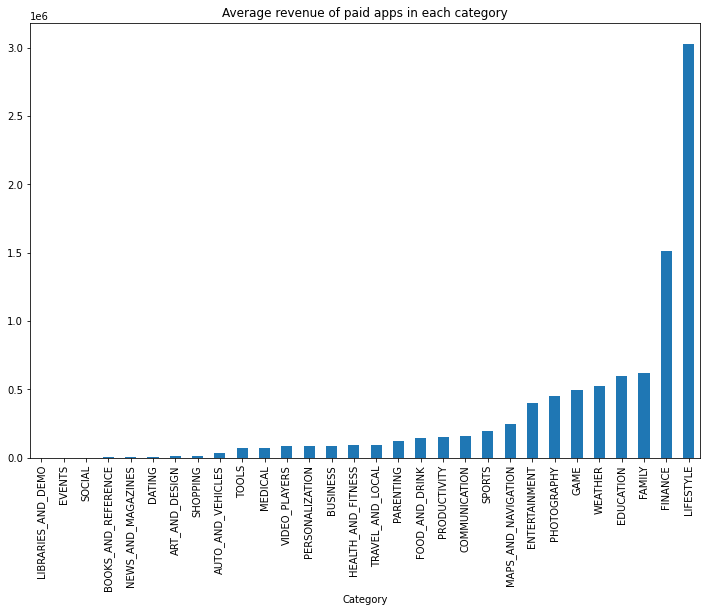

In [51]:
paid_apps.groupby('Category').mean().sort_values(by = 'Revenue', ascending = 'False')['Revenue'].plot(kind = 'bar', title = 'Average revenue of paid apps in each category', fontsize = 10, figsize = (12,8));

Average price of all apps (free + paid) is:  1.0973441706357308 $


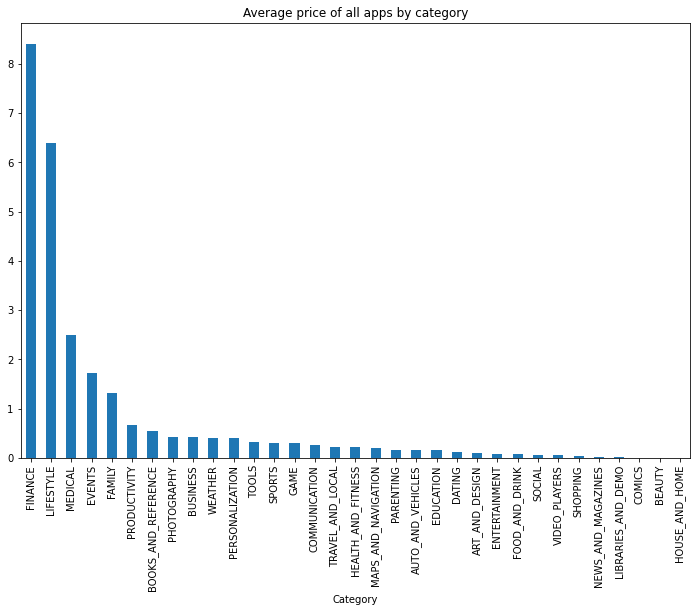

In [52]:
google_data.groupby('Category').mean().sort_values(by = 'Price', ascending = False)['Price'].plot(kind = 'bar', title = 'Average price of all apps by category', fontsize = 10, figsize = (12,8));
print('Average price of all apps (free + paid) is: ', google_data.Price.mean(), '$')

Average price of paid apps:  14.055901856763812 $


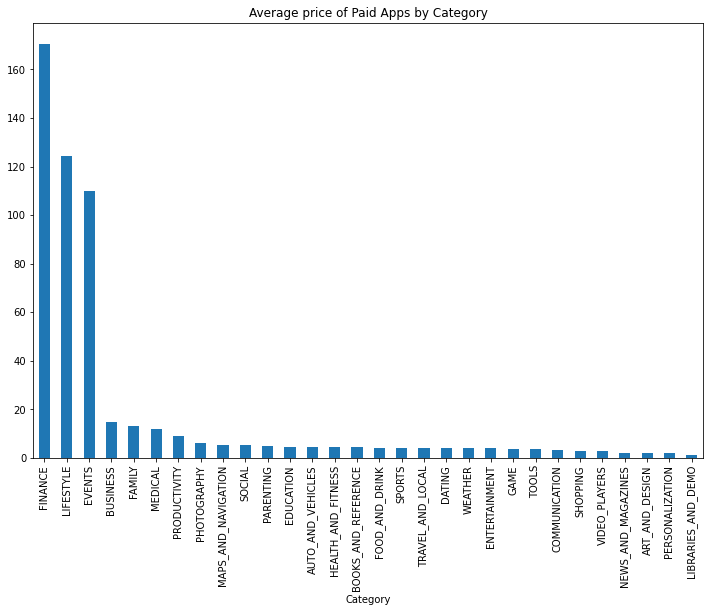

In [53]:
paid_apps.groupby('Category').mean().sort_values(by = 'Price', ascending = False)['Price'].plot(kind = 'bar', title = 'Average price of Paid Apps by Category', fontsize = 10, figsize = (12,8));
print('Average price of paid apps: ', paid_apps.Price.mean(), '$' )

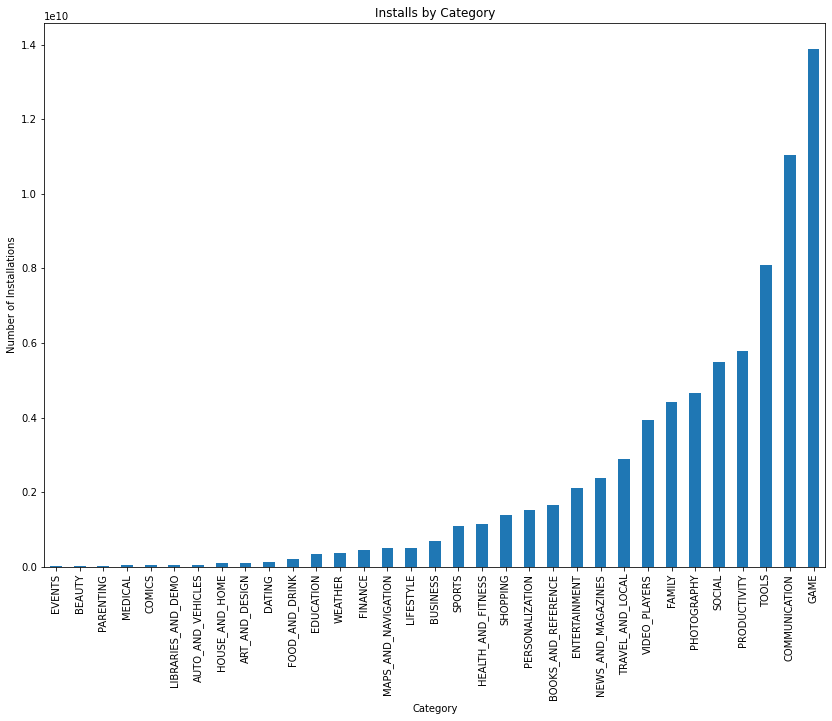

In [54]:
google_data.groupby('Category').sum().sort_values(by ='Installs', ascending = 'False')['Installs'].plot(kind = 'bar', title = 'Installs by Category', fontsize = 10, figsize = (14,10));
plt.ylabel('Number of Installations');

Average size of an application is 0.017805630513563882 Megabytes


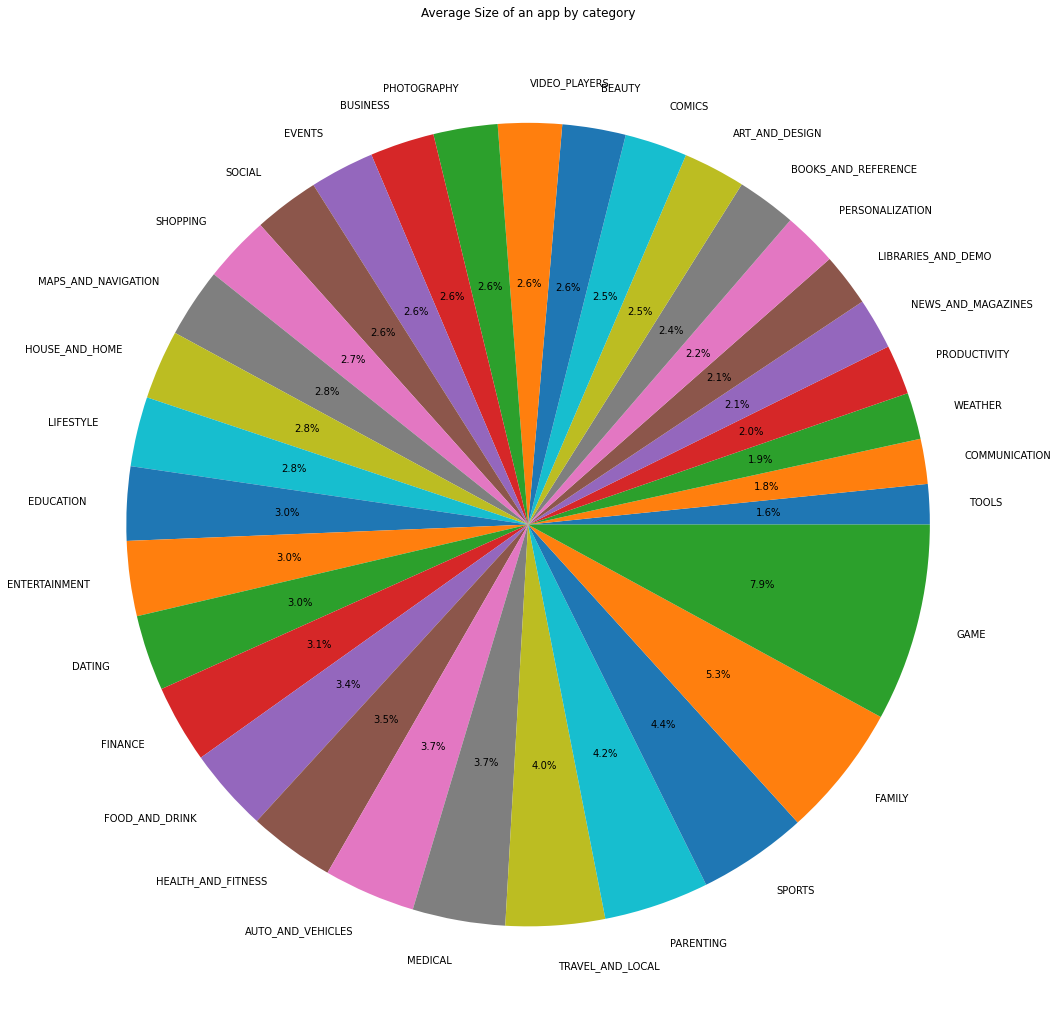

In [55]:
google_data.groupby('Category').mean().sort_values(by = 'Size', ascending = 'False')['Size'].plot(kind = 'pie',autopct='%1.1f%%', title = 'Average Size of an app by category', label = '', fontsize = 10, figsize = (18, 20)); 
print('Average size of an application is', google_data.Size.mean()/1e6,'Megabytes' )

In [56]:
google_data.Size.describe()

count      9658.000000
mean      17805.630514
std       21496.038170
min           0.000000
25%        2900.000000
50%        9100.000000
75%       25000.000000
max      100000.000000
Name: Size, dtype: float64

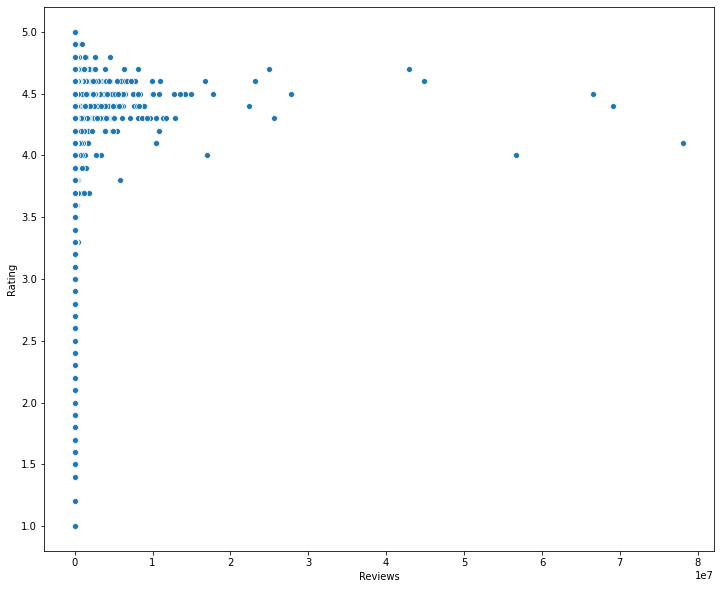

In [57]:
plt.figure(figsize = (12,10))
sns.scatterplot(x = google_data.Reviews, y = google_data.Rating, edgecolor = 'white');

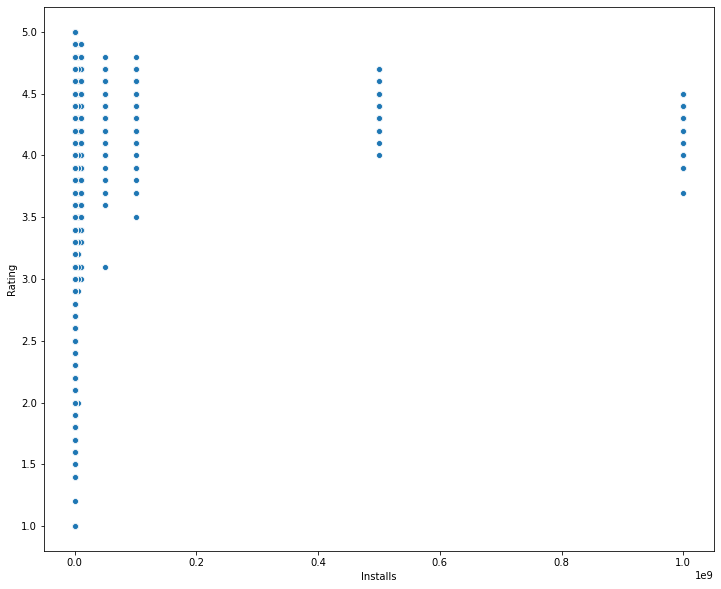

In [58]:
plt.figure(figsize = (12,10))
sns.scatterplot(x = google_data.Installs, y = google_data.Rating, edgecolor = 'white');

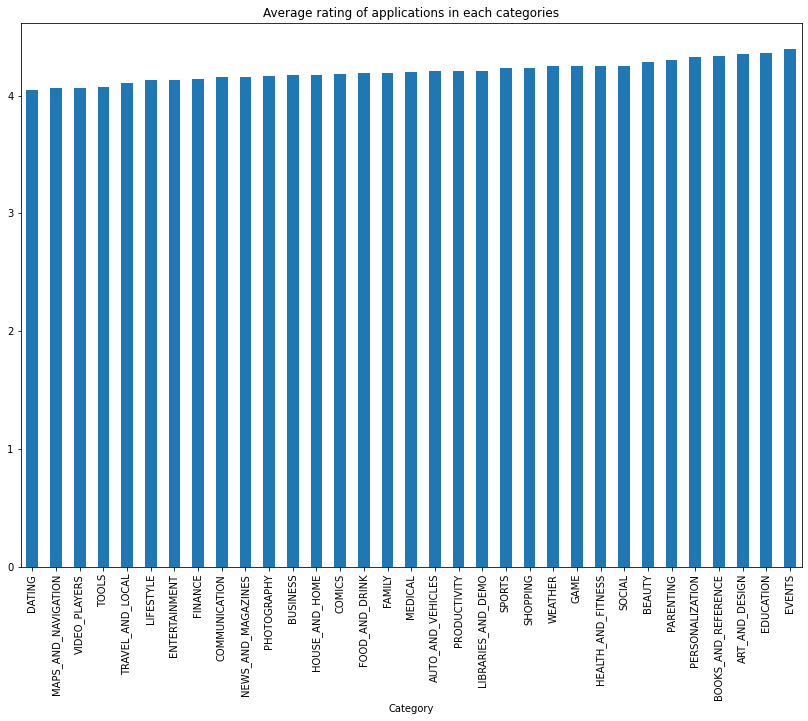

In [59]:
google_data.groupby('Category').mean().sort_values(by = 'Rating', ascending = 'False')['Rating'].plot(kind = 'bar', title = 'Average rating of applications in each categories', fontsize = 10, figsize = (14,10));

In [60]:
google_data[(google_data.Rating == 5.0) & (google_data.Reviews > 100) & (google_data.Installs >= 5000)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_n,Type_n,ContentRating_n
7473,Oración CX,LIFESTYLE,5.0,103,3800.0,5000.0,Free,0.0,Everyone,Lifestyle,2017,5.1.10,4.1,18,0,1


In [61]:
# Most Number of reviews
google_data[google_data.Reviews == google_data.Reviews.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_n,Type_n,ContentRating_n
2393,Facebook,SOCIAL,4.1,78158306,0.0,1.000000e+09,Free,0.0,Teen,Social,2018,Varies with device,Varies with device,27,0,4


In [62]:
google_data[(google_data.Installs == google_data.Installs.max ()) & (google_data.Reviews == google_data.Reviews.max())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_n,Type_n,ContentRating_n
2393,Facebook,SOCIAL,4.1,78158306,0.0,1.000000e+09,Free,0.0,Teen,Social,2018,Varies with device,Varies with device,27,0,4


In [63]:
# Most Revenue from Installations
paid_apps[paid_apps.Revenue == paid_apps.Revenue.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_n,Type_n,ContentRating_n,Revenue
10100,Minecraft,FAMILY,4.5,2376564,0.0,10000000.0,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018,1.5.2.1,Varies with device,11,1,2,69900000.0


In [64]:
# Most Revenue from Installations
paid_apps[paid_apps.Revenue == paid_apps.Revenue.max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Category_n,Type_n,ContentRating_n,Revenue
10100,Minecraft,FAMILY,4.5,2376564,0.0,10000000.0,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018,1.5.2.1,Varies with device,11,1,2,69900000.0


In [65]:
google_data['Last Updated']

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
10834    2015
10835    2018
10836    2015
10837    2018
10838    2012
Name: Last Updated, Length: 9658, dtype: object

In [66]:
google_data['Last Updated'] = google_data['Last Updated'].apply(lambda x: x.days) # Convert Last Updated column to represent in days  

AttributeError: 'str' object has no attribute 'days'

In [ ]:
array = google_data.Category.unique()
for i in range(len(array)):
    print('Category:',array[i], 'Mean:', google_data[google_data.Category == array [i]]['Last Updated'].mean(), 'days')

In [ ]:
df = google_data
df.dtypes

In [ ]:
# Barchart
my_colors = list(islice(cycle(['b', 'r', 'g', 'c', 'y', 'm','k']), None, len(df1))) # a way to represent different colours 

df1.Category_n.value_counts().plot(kind = 'bar', color = my_colors, figsize = (10,8), title = 'Number of apps in each category');
plt.xlabel('Category')
plt.ylabel('Frequency');

In [ ]:
# Piechart
df1['Category_n'].value_counts().plot.pie(y = df1['Category_n'], figsize = (15, 16), label = '', autopct = '%1.1f%%', title = 'Distribution of apps by category', );# label = '' removes column name

In [ ]:
# Barchart
df1.Rating.value_counts().plot(kind = 'bar', stacked = True, figsize = (12, 8), title = 'Distribution of Rating among apps available on Google Play Store'); # Historgram of frequencies 
plt.xlabel('Rating')
plt.ylabel('Frequencies');

In [ ]:
df1.Reviews = pd.to_numeric(df1.Reviews)

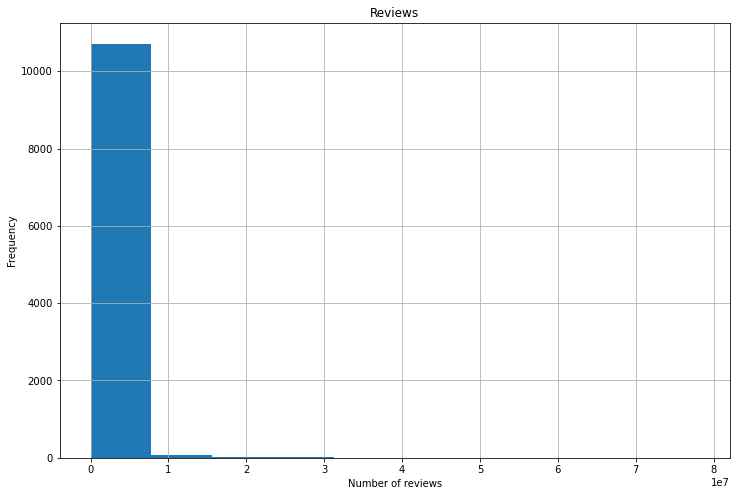

In [67]:
df1.hist(column = 'Reviews', figsize = (12, 8))
plt.xlabel('Number of reviews')
plt.ylabel('Frequency');


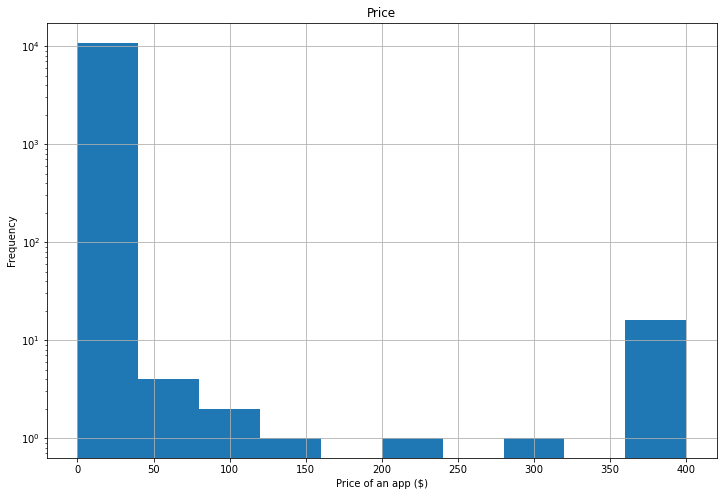

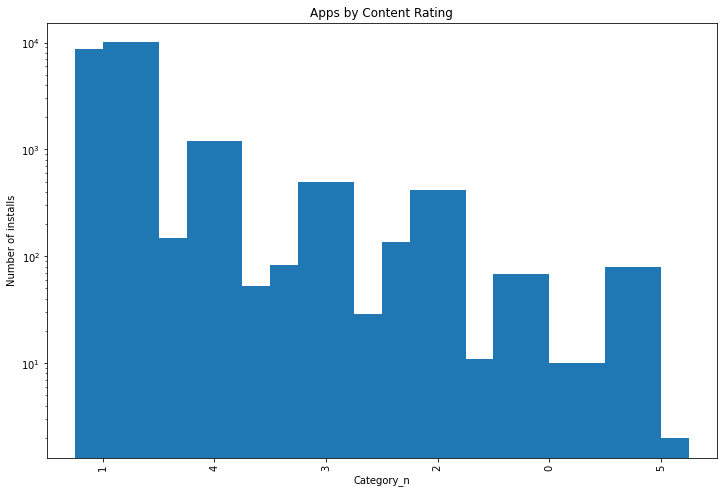

In [68]:
# Log view of the graph
# df1.hist(column = 'Reviews', figsize = (12, 10))
# plt.xlabel('Number of reviews')
# plt.ylabel('Frequency')
# plt.yscale('log')

# Plotting Histogram
# df1.hist(column = 'Size', figsize = (12, 8))
# plt.xlabel('Size of an app (in bytes)')
# plt.ylabel('Frequency')

df1.Price = pd.to_numeric(df1.Price)
df1.hist(column = 'Price', figsize = (12, 8))
plt.xlabel('Price of an app ($)')
plt.ylabel('Frequency');
plt.yscale('log')

df1.Price = pd.to_numeric(df1.Price)
df1.hist(column = 'Price', figsize = (12, 8), range = [0, 5])
plt.xlabel('Price of an app ($)')
plt.ylabel('Frequency')
plt.yscale('log')

df1['ContentRating_n'].value_counts().plot(kind = 'bar', title = 'Apps by Content Rating',figsize = (12,8)) 
plt.xlabel('Category_n')
plt.ylabel('Number of installs')
plt.yscale('log')

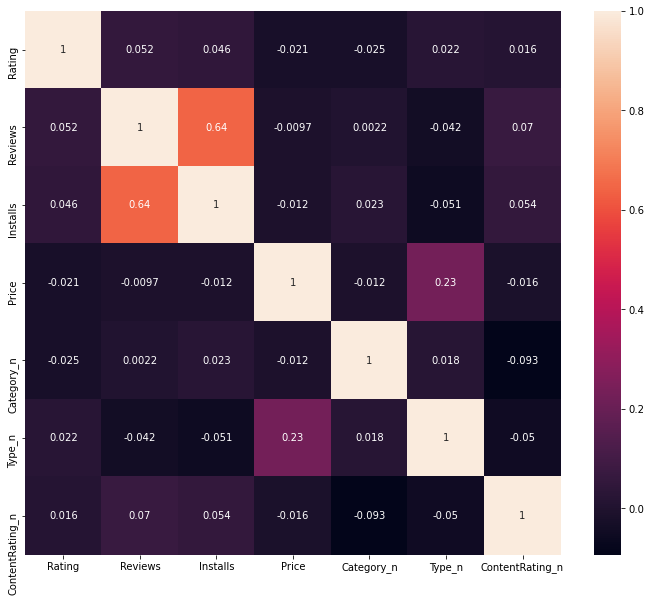

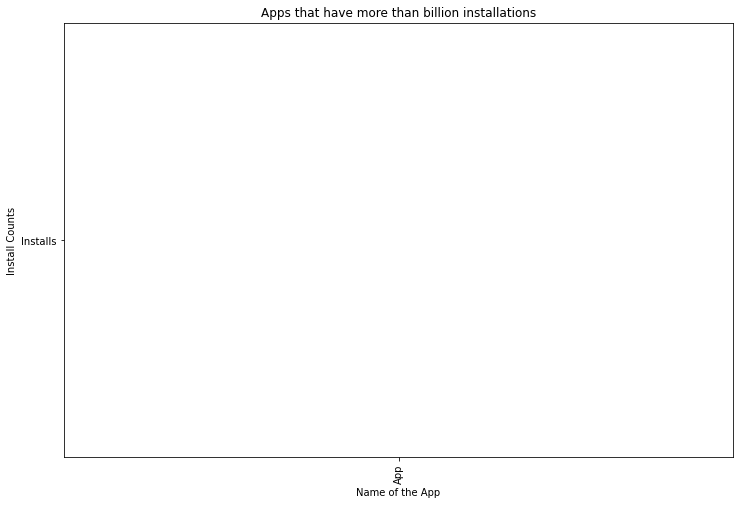

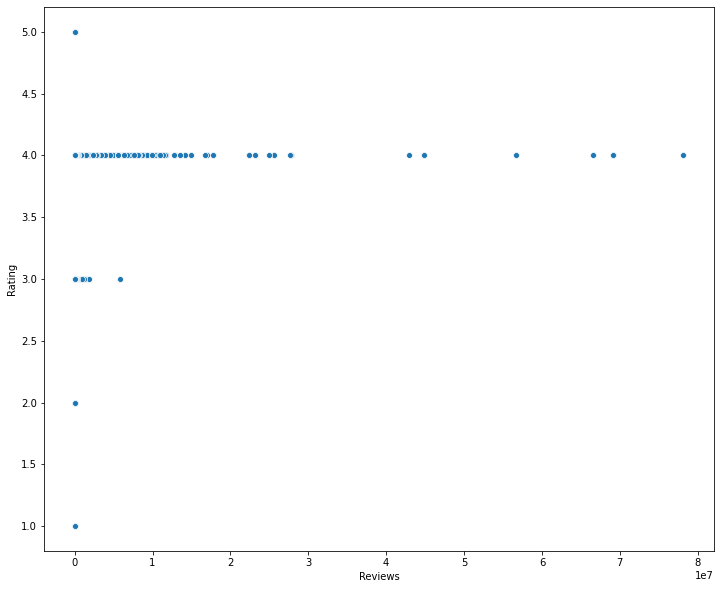

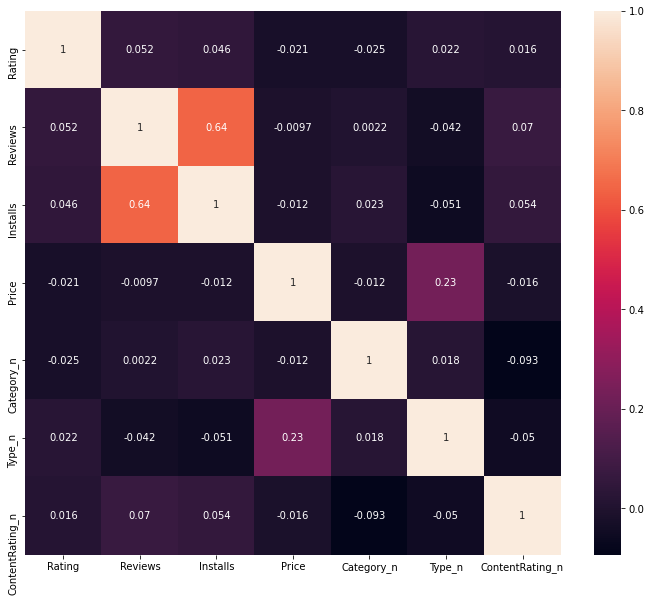

In [69]:
# Correlation map
plt.figure(figsize = (12, 10)); # Adding command before the heatmap allows to control the size of a plot
sns.heatmap(df1.corr(), annot = True);

plt.figure(figsize = (12,8))
plt.bar('App', 'Installs', data = google_data["Installs"], color = 'blue')
plt.xticks(rotation = 90);
plt.xlabel('Name of the App')
plt.ylabel('Install Counts')
plt.title('Apps that have more than billion installations');

plt.figure(figsize = (12,10))
sns.scatterplot(x = df1.Reviews, y = df1.Rating, edgecolor = 'white');

plt.figure(figsize = (12,10))
sns.scatterplot(x = google_data.Installs, y = google_data.Rating, edgecolor = 'white');

sns.heatmap(df1.corr(), annot = True)

## Apply Various Algorithms ot the Dataset

Note: The Output Variable here is categorical in nature

In [70]:
## Identify the predictors and the target variable
X = df1.drop(['Rating', 'App'], axis = 'columns')
y = df1['Rating']

## Split the dataset into train and test model
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2, random_state = 3)
# Print and understand the train test
print("The dimensions of the Train Dataset\n   Predictors dataset dimension: {}\n   Target dataset dimension: {}"\
      .format(X_train.shape, y_train.shape))
print("The dimensions of the Test Dataset\n   Predictors dataset dimension: {}\n   Target dataset dimension: {}"\
      .format(X_test.shape, y_test.shape))

The dimensions of the Train Dataset
   Predictors dataset dimension: (8671, 8)
   Target dataset dimension: (8671,)
The dimensions of the Test Dataset
   Predictors dataset dimension: (2168, 8)
   Target dataset dimension: (2168,)


#### Logistic Regression Model

In [71]:
## Apply Logistic Regression on the model
print("------------Regression------------")
lr = LogisticRegression()
# Fit the model
lr.fit(X_train, y_train)
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)
# Print the required results
print('Coefficients of the logistic regression is: \n', lr.coef_)
print("\n")
print('Variance score of the model is: ',format(lr.score(X_test, y_test)))
print ("Logistic regression train score: ", train_score)
print ("Logistic regression test score: ", test_score)

------------Regression------------
Coefficients of the logistic regression is: 
 [[-2.72830756e-06 -9.26878377e-05 -5.84266775e-05 -2.92148311e-08
  -2.37361494e-05 -1.95433668e-07 -1.89271280e-09 -1.56077382e-08]
 [-1.12440574e-05 -6.33109288e-05  5.00983501e-05 -2.00524882e-08
  -2.85276574e-05 -2.33877965e-07 -2.03459172e-09 -1.90454480e-08]
 [ 4.89949728e-06  6.27987454e-05  5.19358701e-05  3.46796427e-08
  -3.37181575e-05 -2.89162936e-07 -2.24591690e-09 -1.78370103e-08]
 [ 1.20891490e-05  1.08190485e-04  5.19154015e-05  4.33622372e-08
   9.88926740e-05  8.29585079e-07  7.59344337e-09  6.09339694e-08]
 [-3.01628133e-06 -1.49904642e-05 -9.55229441e-05 -2.87745606e-08
  -1.29107097e-05 -1.11110510e-07 -1.42022195e-09 -8.44377286e-09]]


Variance score of the model is:  0.7859778597785978
Logistic regression train score:  0.7902202744781456
Logistic regression test score:  0.7859778597785978


C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
## Applying CV on the logistic regression
lr = LogisticRegressionCV(cv = 100, n_jobs = 1, solver = 'liblinear', random_state = 10)
lr.fit(X, y)
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)
# Print the required results
print('Coefficients of the logistic regression is: \n', lr.coef_)
print("\n")
print('Variance score of the model is: ',format(lr.score(X_test, y_test)))
print ("Logistic regression train score: ", train_score)
print ("Logistic regression test score: ", test_score)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 56 members, which is less than n_splits=100.
  warnings.warn(("The least populated class in y has only %d"


Coefficients of the logistic regression is: 
 [[-2.22448384e-04 -8.35080549e-06 -3.22385225e-06 -4.76450932e-06
  -2.16008795e-03 -1.74289823e-05 -2.33847535e-07 -1.48220603e-06]
 [-1.15600733e-04 -4.85837417e-07 -3.74697385e-08 -1.43808170e-06
  -1.58234767e-03 -1.21189814e-05 -1.34305125e-07 -1.10336237e-06]
 [-4.99472916e-06  2.45531177e-07  8.95734645e-09 -5.60851269e-08
  -7.01223250e-04 -5.78276874e-06 -5.58859298e-08 -3.86301559e-07]
 [ 7.08201208e-06  1.30962105e-06 -1.07857876e-08  3.59744380e-08
   4.99571393e-04  4.03053317e-06  4.57007720e-08  2.86187823e-07]
 [-2.12122218e-05 -9.24613405e-07 -6.45994664e-04 -2.19735891e-06
  -9.43712421e-04 -8.10706888e-06 -1.14515276e-07 -6.00454833e-07]]


Variance score of the model is:  0.7892066420664207
Logistic regression train score:  0.7911428900934149
Logistic regression test score:  0.7892066420664207


In [73]:
#Applying GridSearchCV on Logistic Regression
tuned_parameters = [{'C' :[10**-6, 10**-4, 10**-2, 10**0, 10**2, 10**4]}]
grid = GridSearchCV(LogisticRegression(n_jobs = 1, solver = 'liblinear', random_state = 10, max_iter = 1000), \
                    tuned_parameters, scoring = 'f1_weighted')
grid.fit(X_train, y_train)
print("Best Grid Estimators: ",grid.best_estimator_)
print('Variance score of the model is: {}'.format(grid.score(X_test, y_test)))
print ("Logistic regression train score: ", grid.score(X_train, y_train))
print ("Logistic regression test score: ", grid.score(X_test, y_test))

Best Grid Estimators:  LogisticRegression(C=1e-06, max_iter=1000, n_jobs=1, random_state=10,
                   solver='liblinear')
Variance score of the model is: 0.6968659438916371
Logistic regression train score:  0.6997883828070611
Logistic regression test score:  0.6968659438916371


#### Decision Tree Model

In [74]:
## Decision Tree
print("------------Decision Tree------------")
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
print("The Decision Tree model gives score\n  Train: {}\n  Test: {}".format(model.score(X_train, y_train), \
                                                                            model.score(X_test, y_test)))
y_pred = model.predict(X_test)
print("\nThe accuracy on prediciton and test", metrics.accuracy_score(y_test, y_pred))
print("\nClassification Report of Decision Tress:\n",classification_report(y_test, y_pred))
scores = cross_val_score(estimator = model, X = X, y = y, cv = 7, n_jobs = 4)
print("Cross Validation Score for Decision Tree: ", scores.mean())

------------Decision Tree------------
The Decision Tree model gives score
  Train: 0.999654019144274
  Test: 0.7011070110701108

The accuracy on prediciton and test 0.7011070110701108

Classification Report of Decision Tress:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        12
         2.0       0.05      0.06      0.06        47
         3.0       0.31      0.34      0.32       337
         4.0       0.84      0.81      0.82      1711
         5.0       0.28      0.25      0.26        61

    accuracy                           0.70      2168
   macro avg       0.29      0.29      0.29      2168
weighted avg       0.72      0.70      0.71      2168

Cross Validation Score for Decision Tree:  0.6826163583073518


In [75]:
## Decision Tree
model = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 3, min_samples_leaf = 5)
model.fit(X_train, y_train)
print("The Decision Tree model gives score\n  Train: {}\n  Test: {}".format(model.score(X_train, y_train), \
                                                                            model.score(X_test, y_test)))
y_pred = model.predict(X_test)
print("\nThe accuracy on prediciton and test", metrics.accuracy_score(y_test, y_pred))
print("\nClassification Report of Decision Tress:\n",classification_report(y_test, y_pred))
scores = cross_val_score(estimator = model, X = X, y = y, cv = 7, n_jobs = 4)
print("Cross Validation Score for Decision Tree: ", scores.mean())

The Decision Tree model gives score
  Train: 0.7906815822857802
  Test: 0.7892066420664207

The accuracy on prediciton and test 0.7892066420664207

Classification Report of Decision Tress:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        12
         2.0       0.00      0.00      0.00        47
         3.0       0.00      0.00      0.00       337
         4.0       0.79      1.00      0.88      1711
         5.0       0.00      0.00      0.00        61

    accuracy                           0.79      2168
   macro avg       0.16      0.20      0.18      2168
weighted avg       0.62      0.79      0.70      2168

Cross Validation Score for Decision Tree:  0.7903866222173608


C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
# Fitting the Grid Search on Decision Tree
params = {'criterion' : ['gini' , 'entropy'], 'max_depth' : range(1,10), 'min_samples_leaf' : range(1,5)}
grid = GridSearchCV(model, params, scoring = 'accuracy', cv = 20)
grid.fit(X_train, y_train)
grid_pred = grid.predict(X_test)
print("Best Grid Search Estimators: ", grid.best_estimator_)
print("The Decision Tree (Grid Search) model gives score\n  Train: {}\n  Test: {}".format(grid.score(X_train, y_train), \
                                                                            grid.score(X_test, y_test)))
print("\nThe accuracy on prediciton and test", metrics.accuracy_score(y_test, grid_pred))
scores = cross_val_score(estimator = grid, X = X, y = y, cv = 7, n_jobs = 4)
print("Cross Validation Score for Decision Tree (Grid Search): ", scores.mean())

Best Grid Search Estimators:  DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=100)
The Decision Tree (Grid Search) model gives score
  Train: 0.7913735439972321
  Test: 0.7896678966789668

The accuracy on prediciton and test 0.7896678966789668
Cross Validation Score for Decision Tree (Grid Search):  0.7903866222173608


#### Random Forest Model

In [77]:
## Random Forrest
print("------------Random Forrest------------")
model = RandomForestClassifier(n_estimators = 10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("The random forest model gives score\n  Train: {}\n  Test: {}\n  Accuracy of the model: {}"\
      .format(model.score(X_train, y_train), model.score(X_test, y_test), accuracy_score(y_test, y_pred)))
print("Classification Report of Random Forrest:\n",classification_report(y_test, y_pred))
scores = cross_val_score(model, X, y, cv=5)
print("Cross Validation Score of random forest: ", scores.mean())

------------Random Forrest------------
The random forest model gives score
  Train: 0.9898512282320379
  Test: 0.7693726937269373
  Accuracy of the model: 0.7693726937269373
Classification Report of Random Forrest:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        12
         2.0       0.15      0.04      0.07        47
         3.0       0.39      0.27      0.32       337
         4.0       0.82      0.92      0.87      1711
         5.0       0.29      0.10      0.15        61

    accuracy                           0.77      2168
   macro avg       0.33      0.27      0.28      2168
weighted avg       0.72      0.77      0.74      2168

Cross Validation Score of random forest:  0.737983497855283


In [78]:
cm = confusion_matrix(y_test, y_pred)
print("The confusion matrix for random forest:\n",cm)

The confusion matrix for random forest:
 [[   0    0    1   11    0]
 [   1    2   10   31    3]
 [   0    6   90  241    0]
 [   1    5  123 1570   12]
 [   0    0    4   51    6]]


In [79]:
# Fitting the Grid Search
params = {'n_estimators':[34,35,65,45]}
grid = GridSearchCV(estimator = model,param_grid = params,scoring = 'accuracy', cv = 5)
grid.fit(X_train, y_train)
grid_pred = grid.predict(X_test)
print("The random forest model after applying grid search gives the following score\n  Train: {}\n  Test: {}\n  Accuracy of the model: {}".format(grid.score(X_train, y_train), grid.score(X_test, y_test), accuracy_score(y_test, grid_pred)))
print("Classification Report of Random Forrest:\n",classification_report(y_test, grid_pred))

The random forest model after applying grid search gives the following score
  Train: 0.9995386921923654
  Test: 0.7818265682656826
  Accuracy of the model: 0.7818265682656826
Classification Report of Random Forrest:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        12
         2.0       0.30      0.06      0.11        47
         3.0       0.47      0.23      0.30       337
         4.0       0.82      0.94      0.88      1711
         5.0       0.13      0.05      0.07        61

    accuracy                           0.78      2168
   macro avg       0.34      0.26      0.27      2168
weighted avg       0.73      0.78      0.74      2168



In [80]:
## Boosting Methods
print("------------Gradient Boosting------------")
# evaluate the model gradient boost
model = GradientBoostingClassifier()
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error',\
                           cv = cv, n_jobs = -1, error_score = 'raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
print("Accuracy Gradient", model.score(X_train, y_train))

------------Gradient Boosting------------
MAE: -0.243 (0.017)
Accuracy Gradient 0.8089032406873486


In [81]:
# evaluate the model CatBoost
print("------------CatBoost Classifier------------")
model = CatBoostClassifier(verbose = 0, n_estimators = 100)
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
n_scores = cross_val_score(model, X_train, y_train, scoring = 'neg_mean_absolute_error',\
                           cv = cv, n_jobs = -1, error_score = 'raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = CatBoostClassifier(verbose = 0, n_estimators = 100)
model.fit(X_train, y_train)
print("Accuracy CatBoost", model.score(X_train, y_train))

------------CatBoost Classifier------------
MAE: -0.240 (0.015)
Accuracy CatBoost 0.8328912466843501


In [82]:
# evaluate the model Adaboost
print("------------AdaBoost Classifier------------")
regr = AdaBoostClassifier(random_state = 0, n_estimators = 100)
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
n_scores = cross_val_score(regr, X_train, y_train, scoring='neg_mean_absolute_error',\
                           cv = cv, n_jobs = -1, error_score = 'raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
regr = AdaBoostClassifier(random_state = 0, n_estimators = 100)
regr.fit(X, y)
print("Accuracy Adaboost", regr.score(X_train, y_train))

------------AdaBoost Classifier------------
MAE: -1.057 (0.340)
Accuracy Adaboost 0.5595663706608235


#### Naive Bayesian Model

In [83]:
## Naive Bayesian
print("------------Gausian Naive Bayesian------------")
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy of the Naive Bayes\n  Train: {}\n  Test: {}\n  Accuracy of the model: {}"\
      .format(model.score(X_train,y_train), model.score(X_test,y_test), accuracy_score(y_test, y_pred)))
print("Cross Validation of the Naive Bayesian Model: ",(cross_val_score(GaussianNB(),X_train, y_train, cv=5)).mean())
print("\nClassification Report of Gausian Naive Bayes:\n",classification_report(y_test, y_pred))

------------Gausian Naive Bayesian------------
Accuracy of the Naive Bayes
  Train: 0.17010725406527505
  Test: 0.16512915129151293
  Accuracy of the model: 0.16512915129151293
Cross Validation of the Naive Bayesian Model:  0.17783565842000473

Classification Report of Gausian Naive Bayes:
               precision    recall  f1-score   support

         1.0       0.00      0.08      0.00        12
         2.0       0.01      0.04      0.01        47
         3.0       0.15      0.20      0.17       337
         4.0       0.98      0.13      0.23      1711
         5.0       0.09      1.00      0.16        61

    accuracy                           0.17      2168
   macro avg       0.25      0.29      0.12      2168
weighted avg       0.80      0.17      0.22      2168



In [84]:
## Naive Bayesian
print("------------Multinomial Naive Bayesian------------")
model = MultinomialNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy of the Multinomial Naive Bayes\n  Train: {}\n  Test: {}\n  Accuracy of the model: {}"\
      .format(model.score(X_train,y_train), model.score(X_test,y_test), accuracy_score(y_test, y_pred)))
print("Cross Validation of the Multinomial Naive Bayesian Model: ",(cross_val_score(MultinomialNB(),X_train, y_train, cv=5)).mean())
print("\nClassification Report of Multinomial Naive Bayes:\n",classification_report(y_test, y_pred))

------------Multinomial Naive Bayesian------------
Accuracy of the Multinomial Naive Bayes
  Train: 0.29615961250144157
  Test: 0.2845940959409594
  Accuracy of the model: 0.2845940959409594
Cross Validation of the Multinomial Naive Bayesian Model:  0.2968519755757872

Classification Report of Multinomial Naive Bayes:
               precision    recall  f1-score   support

         1.0       0.01      0.17      0.01        12
         2.0       0.02      0.13      0.03        47
         3.0       0.25      0.27      0.26       337
         4.0       0.95      0.27      0.42      1711
         5.0       0.10      1.00      0.19        61

    accuracy                           0.28      2168
   macro avg       0.26      0.37      0.18      2168
weighted avg       0.79      0.28      0.38      2168



In [85]:
## Naive Bayesian
print("------------Bernoulli Naive Bayesian------------")
model = BernoulliNB(binarize = 0.0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy of the Bernoulli Naive Bayes\n  Train: {}\n  Test: {}\n  Accuracy of the model: {}"\
      .format(model.score(X_train,y_train), model.score(X_test,y_test), accuracy_score(y_test, y_pred)))
print("Cross Validation of the Bernoulli Naive Bayesian Model: ",(cross_val_score(BernoulliNB(),X_train, y_train, cv=5)).mean())
print("\nClassification Report of Bernoulli Naive Bayes:\n",classification_report(y_test, y_pred))

------------Bernoulli Naive Bayesian------------
Accuracy of the Bernoulli Naive Bayes
  Train: 0.7906815822857802
  Test: 0.7892066420664207
  Accuracy of the model: 0.7892066420664207
Cross Validation of the Bernoulli Naive Bayesian Model:  0.7905662973784191

Classification Report of Bernoulli Naive Bayes:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        12
         2.0       0.00      0.00      0.00        47
         3.0       0.00      0.00      0.00       337
         4.0       0.79      1.00      0.88      1711
         5.0       0.00      0.00      0.00        61

    accuracy                           0.79      2168
   macro avg       0.16      0.20      0.18      2168
weighted avg       0.62      0.79      0.70      2168



C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
# Fitting the Grid Search
params = [{'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}]
grid = GridSearchCV(BernoulliNB(), params, scoring = 'f1_weighted')
grid.fit(X_train, y_train)
grid_pred = grid.predict(X_test)
print("Best Grid Search Estimators",grid.best_estimator_)
print("Accuracy of the Bernoulli Naive Bayes\n  Train: {}\n  Test: {}\n  Accuracy of the model: {}"\
      .format(grid.score(X_train,y_train), grid.score(X_test,y_test), accuracy_score(y_test, grid_pred)))

Best Grid Search Estimators BernoulliNB(alpha=0.01)
Accuracy of the Bernoulli Naive Bayes
  Train: 0.6982563184325767
  Test: 0.6962271536868502
  Accuracy of the model: 0.7892066420664207
